
Name: Ron Keinan

ID: 203735857

All the cells I added start with "RK"

I ran all the cells in the notebook, added explanatory notes in the various questions.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

data = pd.read_csv('/content/gdrive/MyDrive/Machine Learning course 5783/HW_data/weight-height.csv')

In [3]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar  8 11:53:08 2020

@author: yosi
"""

import numpy as np
import pandas as pd

# RK - get height and weight of men as seperate columns
height = data['Height'][data['Gender'] == 'Male'].tolist()
weight = data['Weight'][data['Gender'] == 'Male'].tolist()

# RK - normalize the height and weight of men
X = (weight-np.mean(weight))/np.std(weight)
y = (height-np.mean(height))/np.std(height)

# Explicit minimization

## phase_1 = np.matmul(X.reshape(-1,1),X.reshape(1,-1))
# Use pseudo-inverse to avoid singularities

## phase_2 = np.linalg.pinv(phase_1)
## phase_3 = np.matmul(phase_2,X.reshape(-1,1))

# W_opt = np.matmul(y.reshape(1,-1),phase_3)

In [7]:
#try the closed form formula
# don't take all the data: heavy computations !!!
X_=X[:1000]
y_=y[:1000]
y_=y_.reshape(1,-1)
X_=X_.reshape(1,-1)

w=np.matmul(X_.T,X_)
w = np.linalg.pinv(w)

w = np.matmul(w,X_.T)

w = np.matmul(y_,w)
print(w)

[[0.84333684]]


W =  0.8628641390517823 ;b =  9.01558827592909e-16


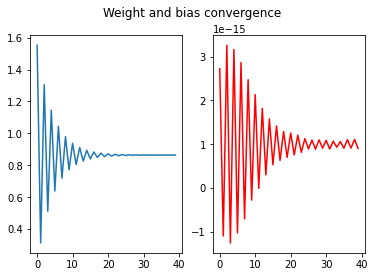

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# Initialization
W = 0
b = 0
L = 0.9 # The learning Rate
epochs = 40  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

b_ = []
W_ = []
# Performing Gradient Descent
for i in range(epochs):
    y_pred = W*X + b  # The current predicted value of Y
    D_W = (-2/n) * sum(X * (y - y_pred))  # Derivative wrt W
    D_b = (-2/n) * sum(y - y_pred)  # Derivative wrt b
    W = W - L * D_W  # Update W
    b = b - L * D_b  # Update b
    W_.append(W)
    b_.append(b)
print('W = ',W, ';b = ',b)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Weight and bias convergence')
ax1.plot(W_)
ax2.plot(b_,'r')

#Sort y (for better visualization) and plot the corresponding predictions

array([[1.        , 0.86297885],
       [0.86297885, 1.        ]])

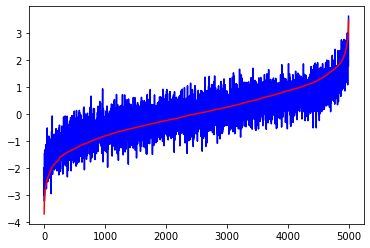

In [10]:
y_sort = np.sort(y)
y_idx = np.argsort(y)
plt.plot(y_pred[y_idx],color='blue', markersize=1)
plt.plot(y_sort,color='red', markersize=1)
np.corrcoef(y,y_pred)

#Calculate mse, the average prediction error

In [11]:
y_pred = W*X + b
mse = np.mean(np.square(y_pred-y))
print(mse)

0.25526751999913916


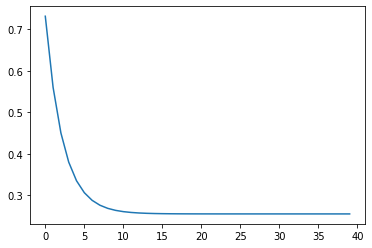

In [12]:
#mse per epoch
mse_ = []
for w in W_:
    y_pred = w*X + b
    mse_.append(np.mean(np.square(y_pred-y)))
plt.plot(mse_)

#Now using minibatch

0.8666773616460854 0.06480824027783844


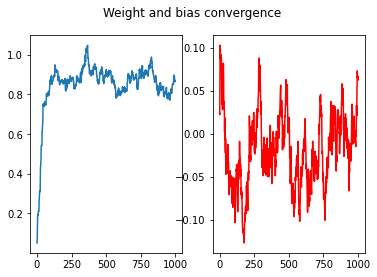

In [13]:
# Stochastic (minibatch)
# general rule is “bigger batch (more confidence in the direction) size bigger learning rate”
#################
# Initialization
W = 0
b = 0
L = 0.01 # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = 1 # minibatch_size

b_ = []
W_ = []
# Performing Gradient Descent
for i in range(epochs):
    #choose a few examples from X in each epoch
    idx = np.random.randint(len(X),size=n) 
    y_pred = W*X[idx] + b  # The current predicted value of Y
    D_W = (-2/n) * np.sum(X[idx] * (y[idx] - y_pred))  # Derivative wrt W
    D_b = (-2/n) * np.sum(y[idx] - y_pred)  # Derivative wrt b
    W = W - L * D_W  # Update W
    b = b - L * D_b  # Update b
    W_.append(W)
    b_.append(b)
print(W,b)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Weight and bias convergence')
ax1.plot(W_)
ax2.plot(b_,'r')

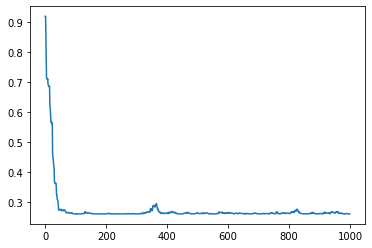

In [14]:
mse_ = []
for w in W_:
    y_pred = w*X + b
    mse_.append(np.mean(np.square(y_pred-y)))
plt.plot(mse_)

#Compare with the bultin LinearRegression function

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1,1), y.reshape(-1,1))
print( lin_reg.coef_,lin_reg.intercept_)

#lin_reg.predict(X_new)

[[0.86297885]] [9.91855601e-16]



# Regularization "limits" the model optimization and is useful in noise



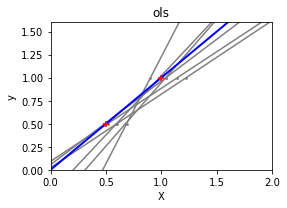

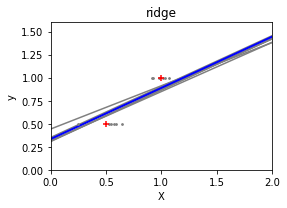

In [16]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    #grey - noisy models
    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='gray')
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

    #blue - clean model
    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

plt.show()

#without reg. models try to get the optimum weights - more variance
#reg. models predictions are biased but with less variance

# Gradient descent code including regularization (L2) term in loss

In [17]:
#Gradient descent with or without L2 regularization
def GD_reg(X,Y,alpha):#L2
    # Initialization
    W = 0
    b = 0
    L = 0.5 # The learning Rate
    epochs = 100  # The number of iterations to perform gradient descent

    n = float(len(X)) # Number of elements in X

    b_ = []
    W_ = []
    # Performing Gradient Descent
    for i in range(epochs):
        Y_pred = W*X + b  # The current predicted value of Y
        D_W = (-2/n) * sum(X * (Y - Y_pred)) + 2*alpha*W # Derivative wrt W. Note the regularization (L2) term
        D_b = (-2/n) * sum(Y - Y_pred)  # Derivative wrt b. We don't apply regularization to intercept term
        W = W - L * D_W  # Update W
        b = b - L * D_b  # Update b
        W_.append(W)
        b_.append(b)
    return W_,b_

# Run the height-weight regression using SGD with regularization. Did it converge to same weight as above? Compare our function with sklearn's Ridge function.

In [ ]:
# Stochastic (minibatch)
# general rule is “bigger batch (more confidence in the direction) size bigger learning rate”
#################
# Initialization
W = 0
b = 0
L = 0.01 # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = 1 # minibatch_size

b_ = []
W_ = []
# Performing Gradient Descent
for i in range(epochs):
    #choose a few examples from X in each epoch
    idx = np.random.randint(len(X),size=n) 
    y_pred = W*X[idx] + b  # The current predicted value of Y
    D_W = (-2/n) * np.sum(X[idx] * (y[idx] - y_pred))  # Derivative wrt W
    D_b = (-2/n) * np.sum(y[idx] - y_pred)  # Derivative wrt b
    W = W - L * D_W  # Update W
    b = b - L * D_b  # Update b
    W_.append(W)
    b_.append(b)
print(W,b)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Weight and bias convergence')
ax1.plot(W_)
ax2.plot(b_,'r')